
# Logistic Regression

In this project, our focus revolves around an advertising dataset that presents information regarding whether a specific internet user engaged with an advertisement on a company's website. Our primary aim is to construct a predictive model capable of determining whether a user will click on an ad, leveraging the various user attributes available in the dataset. Through the analysis of these attributes, our objective is to establish a model that can effectively predict the likelihood of a user clicking on an ad featured on the website.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad (Target)


# 1. Import 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# 2. Reading the data

In [27]:
Data = pd.read_csv(r"advertising.csv")
Data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/2016 20:59,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,3/7/2016 1:40,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,4/18/2016 9:33,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,7/11/2016 1:42,0


In [28]:
Data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55868.450080,180.000100,0.481000,0.50000
std,15.853615,8.785562,26295.327717,43.902339,0.499889,0.50025
min,32.600000,19.000000,1000.540000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47117.162500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57023.600000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65497.567500,218.792500,1.000000,1.00000
max,91.430000,61.000000,713841.570000,269.960000,1.000000,1.00000


In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


There is "zero" Null data hence our data is clean in Non-null terms 

# 3. EDA (Explore the data and gets some inferences)

<Axes: >

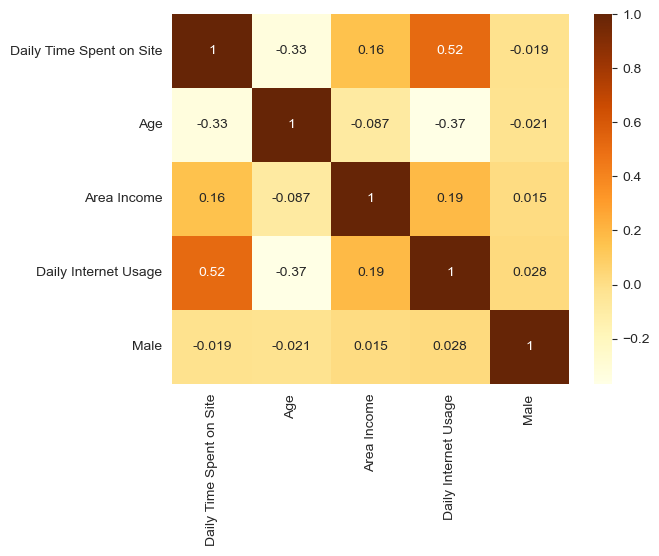

In [30]:
correlation = Data.iloc[:, :-1].corr().round(3)
sns.heatmap(correlation,annot=True,cmap='YlOrBr')

* High Correlation is amongst
* 1. Daily Internet Usage v/s Daily Time Spent on Site
* 2. Age v/s Daily Internet Usage
* 3. Age v/s Daily Time Spent on Site
* 4. Age v/s Area of income

Text(0.5, 0, 'Age')

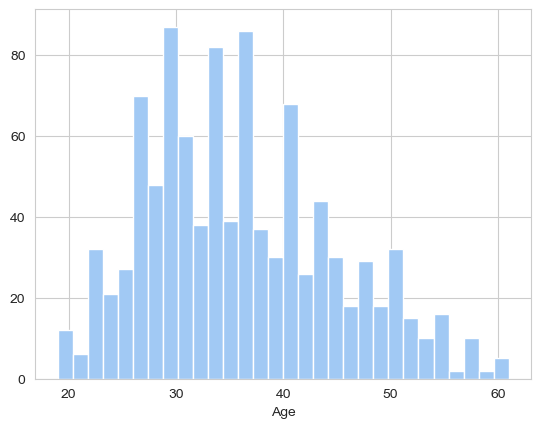

In [31]:
sns.set_palette("pastel")
sns.set_style('whitegrid')

Data['Age'].hist(bins=30)
plt.xlabel('Age')

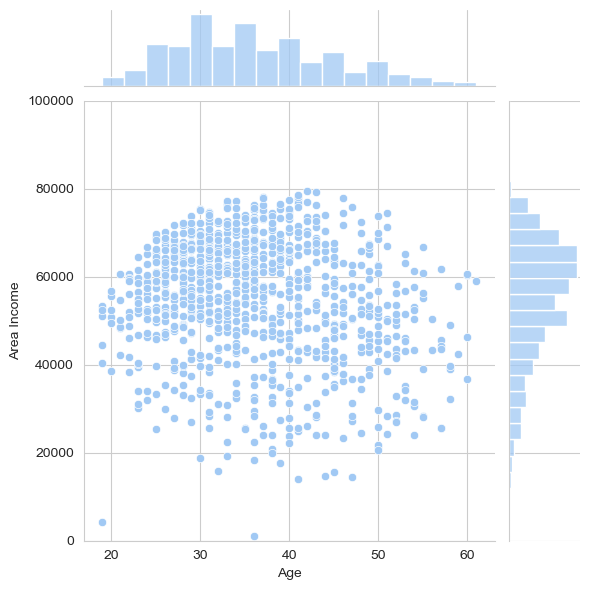

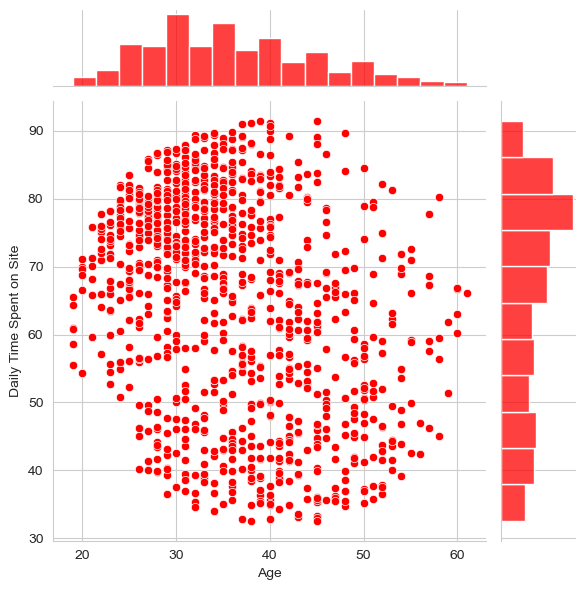

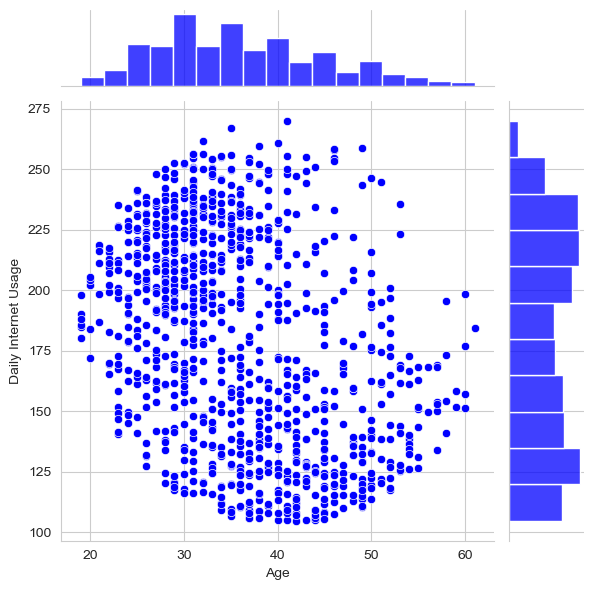

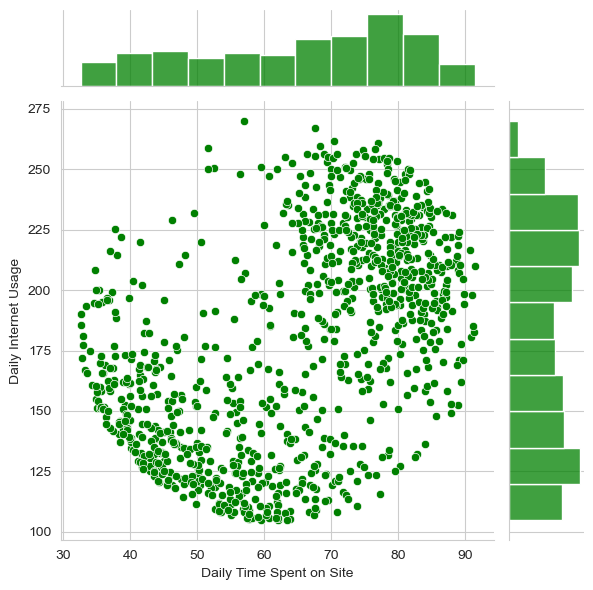

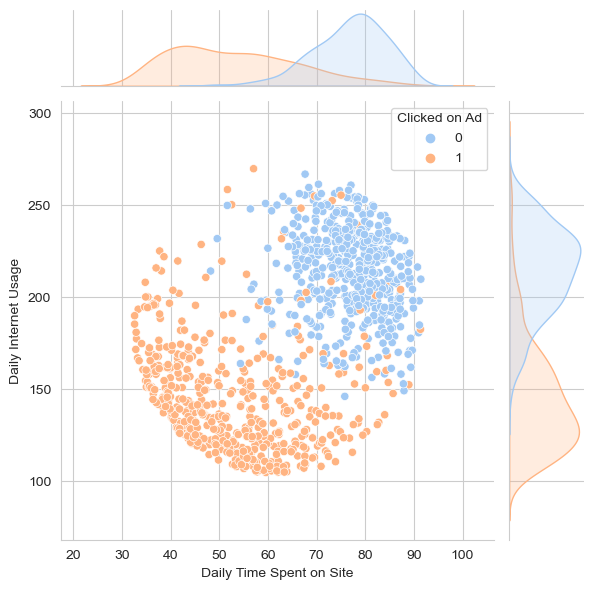

In [34]:
y_min = 0
y_max = 100000  
#There are 2/3 outliers which are getting ignored due to the Range

# Create the joint plot with adjusted y-scale

# Age v/s Area Income
sns.jointplot(x='Age', y='Area Income', data=Data, ylim=(y_min, y_max))

# Age v/s Daily Time Spent on Site
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=Data,color='red');

# Age v/s Daily Time Spent on Site
sns.jointplot(x='Age',y='Daily Internet Usage',data=Data,color='blue');

# Daily Time Spent on Site v/s Daily Internet Usage
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=Data,color='green')
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',hue='Clicked on Ad',data=Data,color='green')

* conclusion over joint plots
* There no standard correlation between these features to eliminate feature. 

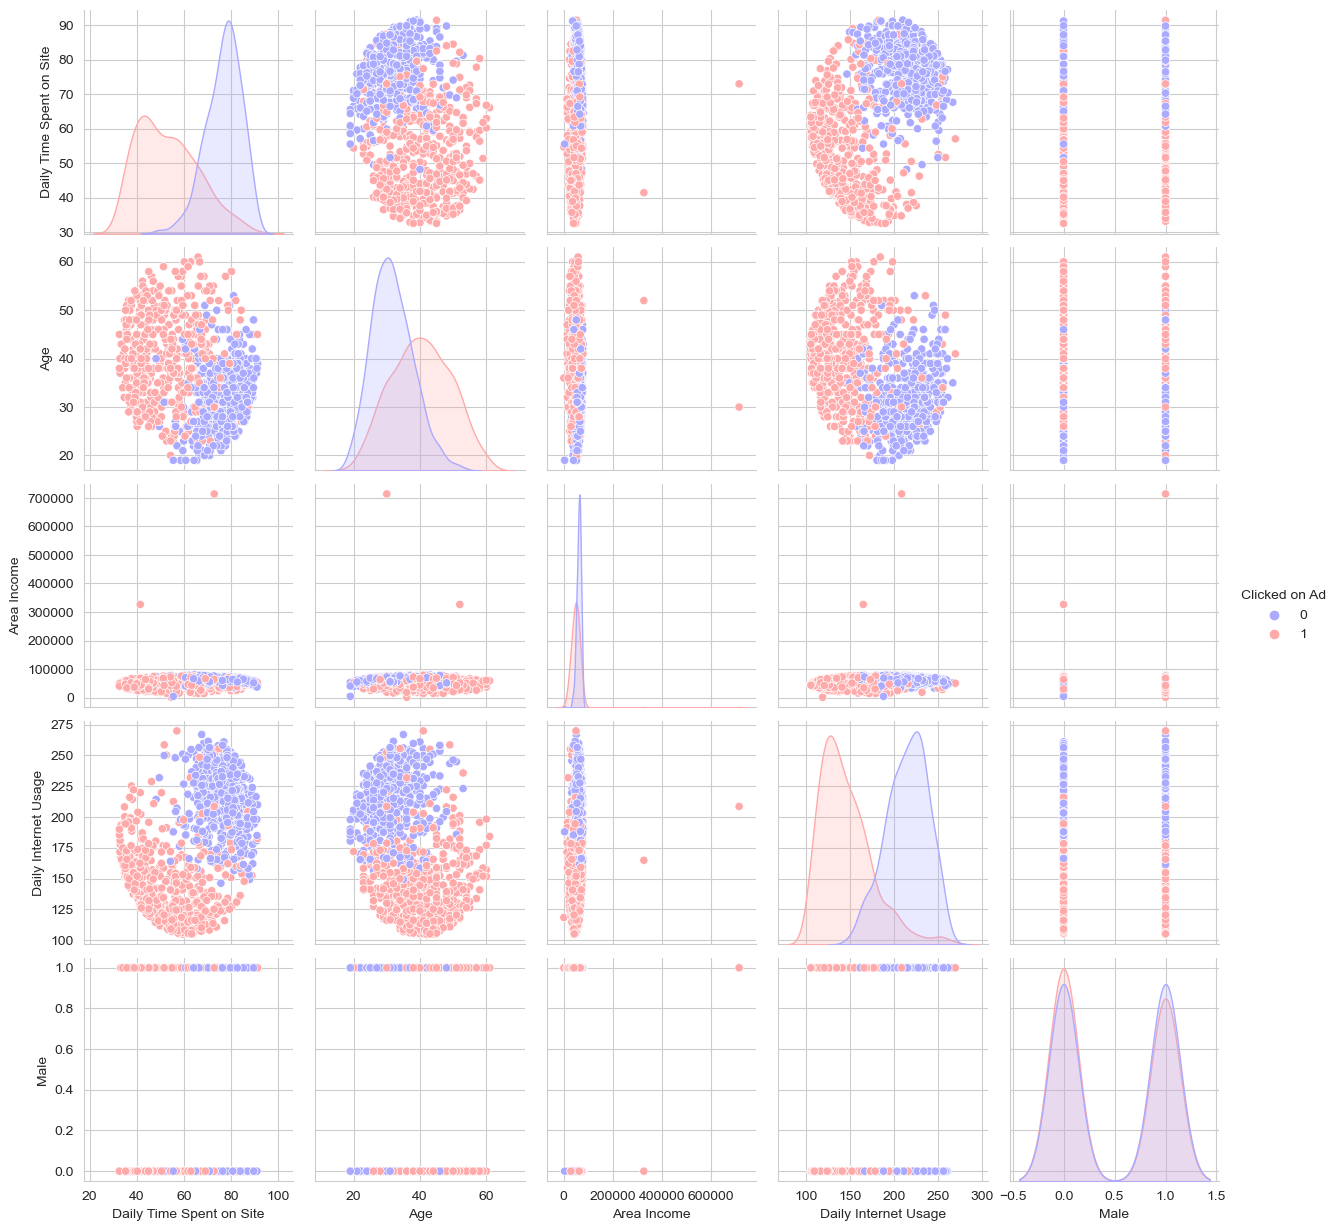

In [33]:
#Creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.

sns.pairplot(Data,hue='Clicked on Ad',palette='bwr')

# 4. Data Cleaning
As per the previous info() about data we found that there are no null datapoints in our dataset but we have encountered outliers

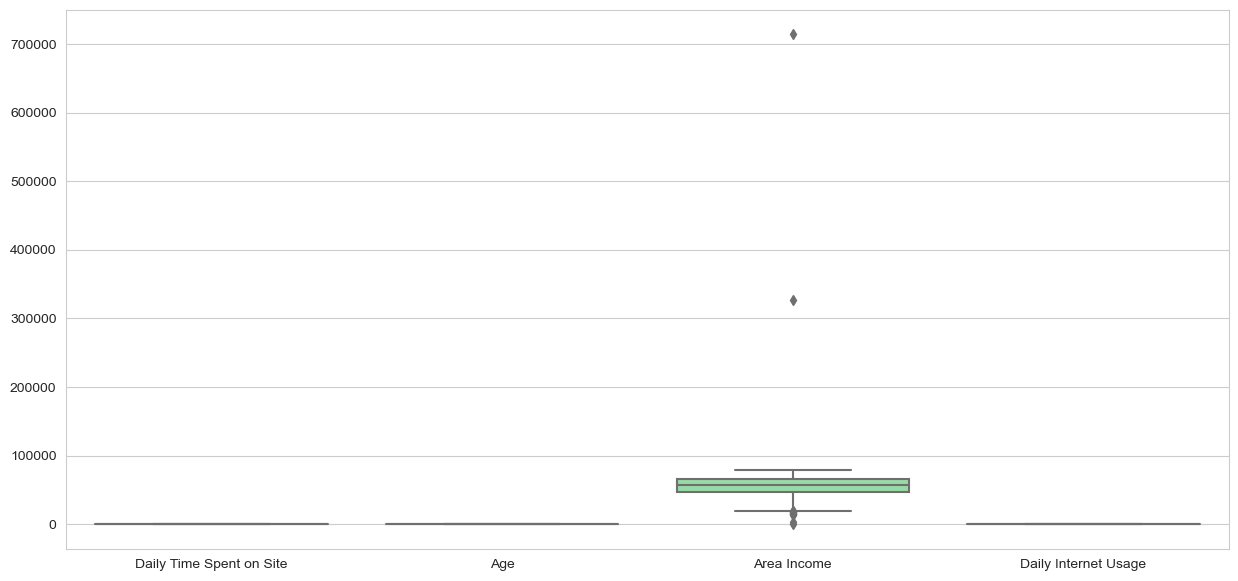

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage']])
plt.show()

In [38]:
#Function to remove the outliers

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [39]:
#Calling the function to remove outliers
Data['Area Income']=remove_outlier_IQR(Data['Area Income'])
Data.dropna(inplace=True)

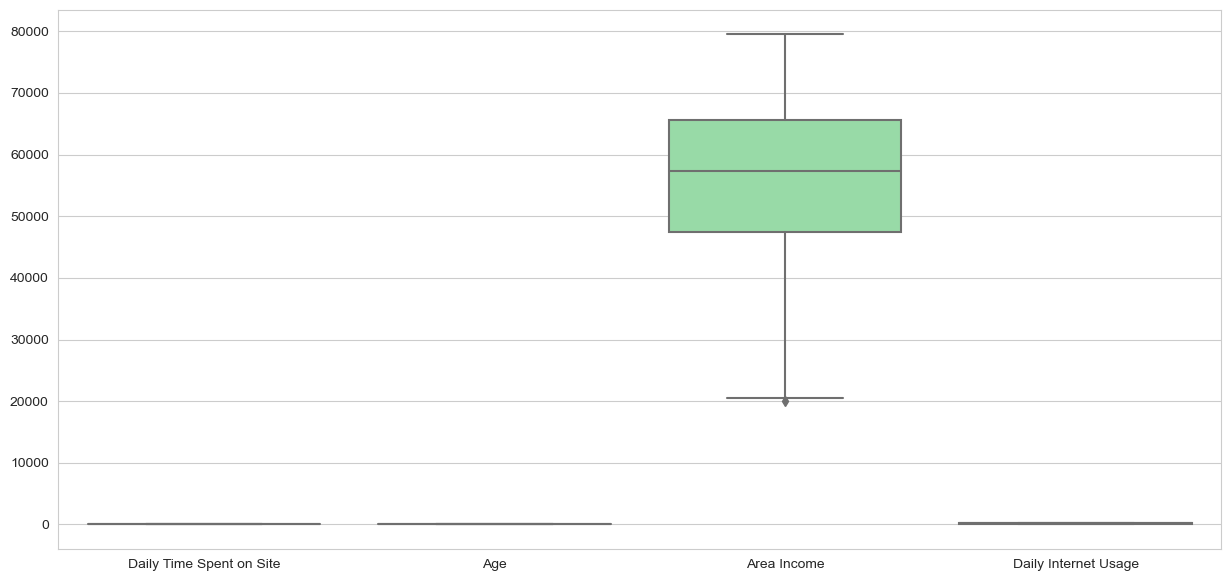

In [40]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage']])
plt.show()

In [41]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       987 non-null    int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      987 non-null    float64
 4   Ad Topic Line             987 non-null    object 
 5   City                      987 non-null    object 
 6   Male                      987 non-null    int64  
 7   Country                   987 non-null    object 
 8   Timestamp                 987 non-null    object 
 9   Clicked on Ad             987 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 84.8+ KB


# 5. Training and Testing Data 

5.1 Splitting Data in Training and Testing Data

In [42]:
#splitting data into train and test data set

from sklearn.model_selection import train_test_split

X = Data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
Y = Data['Clicked on Ad']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [43]:
#Training model 
import statsmodels.api as sm
logmodel = sm.Logit( Y_train, X_train)
logit_res = logmodel.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.248606
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  661
Model:                          Logit   Df Residuals:                      656
Method:                           MLE   Df Model:                            4
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                  0.6413
Time:                        18:49:24   Log-Likelihood:                -164.33
converged:                       True   LL-Null:                       -458.08
Covariance Type:            nonrobust   LLR p-value:                7.858e-126
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0567      0.010     -5.659      0.000      -0.076

conclusion from summary : p value of male and Area Income is high so its advisible to drop them

In [46]:
#dataset after dropping male column
X2 = Data[['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']]
Y2= Data['Clicked on Ad']
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.33, random_state=42)

In [47]:
import statsmodels.api as sm
logmodel1 = sm.Logit( Y2_train, X2_train)
logit_res1 = logmodel1.fit()
print(logit_res1.summary())

Optimization terminated successfully.
         Current function value: 0.249149
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                  661
Model:                          Logit   Df Residuals:                      658
Method:                           MLE   Df Model:                            2
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                  0.6405
Time:                        18:55:53   Log-Likelihood:                -164.69
converged:                       True   LL-Null:                       -458.08
Covariance Type:            nonrobust   LLR p-value:                3.818e-128
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Daily Time Spent on Site    -0.0569      0.010     -5.865      0.000      -0.076

# 6. Evaluating the Model

In [49]:
predictions = logit_res1 .predict(X2_test)

In [54]:
#predictions are in probability forms needs to be converted to 0 or 1

predictions_form=[]
for i in predictions:
    if i >= 0.5:
               i=1
    else: i = 0
    predictions_form.append(i)

In [55]:
predictions_form

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y2_test,predictions_form))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       174
           1       0.93      0.88      0.90       152

    accuracy                           0.91       326
   macro avg       0.91      0.91      0.91       326
weighted avg       0.91      0.91      0.91       326



* f1-score of 91% is acheived 